In [ ]:
import os
import time
import librosa
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import pydub
import pandas as pd
import scipy
import random
from random import shuffle
from scipy.io.wavfile import read as read_wav
from scipy.signal import spectrogram
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import sklearn
import pickle
from pathlib import Path
from collections import Counter
from sklearn.model_selection import cross_validate, GroupKFold, KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import optuna

In [ ]:
current_dir = Path.cwd()
path = current_dir/ 'Audio files 600'
files = []
try:
    with open("audio_files_600elements.txt") as f:
        files = f.readlines()


    # remove new line characters
    files = [x.strip() for x in files]
except FileNotFoundError:
    print("Please check the path")

print(len(files))
print(files)

600
['37_dog_barking.wav', '259_dog_growling.wav', '417_dog_snoring.wav', '317_dog_howling.wav', '498_dog_snoring.wav', '533_dog_whimper.wav', '157_dog_breath.wav', '196_dog_breath.wav', '271_dog_growling.wav', '480_dog_snoring.wav', '22_dog_barking.wav', '313_dog_howling.wav', '368_dog_howling.wav', '554_dog_whimper.wav', '560_dog_whimper.wav', '596_dog_whimper.wav', '301_dog_howling.wav', '588_dog_whimper.wav', '7_dog_barking.wav', '234_dog_growling.wav', '141_dog_breath.wav', '516_dog_whimper.wav', '396_dog_howling.wav', '414_dog_snoring.wav', '509_dog_whimper.wav', '587_dog_whimper.wav', '198_dog_breath.wav', '545_dog_whimper.wav', '105_dog_breath.wav', '86_dog_barking.wav', '154_dog_breath.wav', '134_dog_breath.wav', '505_dog_whimper.wav', '191_dog_breath.wav', '473_dog_snoring.wav', '249_dog_growling.wav', '289_dog_growling.wav', '286_dog_growling.wav', '379_dog_howling.wav', '139_dog_breath.wav', '461_dog_snoring.wav', '251_dog_growling.wav', '228_dog_growling.wav', '450_dog_sno

In [ ]:
fs, signal = read_wav(path / files[132])
print(fs)
print(files[15])

f, t, Sxx = spectrogram(signal, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud', cmap='plasma')

print(np.shape(Sxx))
print(fs)

C:\Users\jakub\AppData\Local\Temp\ipykernel_3048\932675215.py:3: FutureWarning: Pass y=[0.00073755 0.00118351 0.00132763 ... 0.00457859 0.00476158 0.00536084] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc_13_coeffs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=13)


(13, 216)


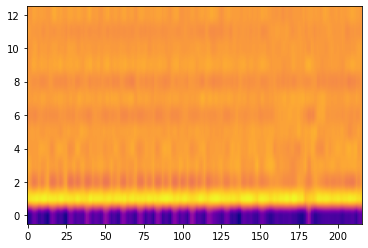

In [ ]:
signal, fs = librosa.load(path / files[132], sr=None) #trzeba zdefiniować częstotliwość próbkowania jako None,

mfcc_13_coeffs = librosa.feature.mfcc(signal, sr=fs, n_mfcc=13)
print(mfcc_13_coeffs.shape)

plt.imshow(mfcc_13_coeffs, cmap='plasma', aspect='auto')
plt.gca().invert_yaxis()

[Text(0.5, 1.0, 'MFCC')]

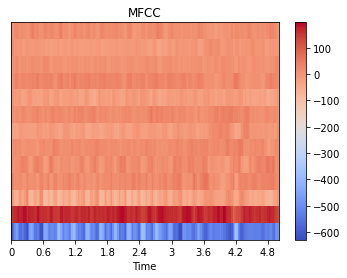

In [ ]:
import librosa.display

fig, ax = plt.subplots()
img = librosa.display.specshow(mfcc_13_coeffs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax) #obok obrazu będzie wyświetlony pasek ze skalą kolorystyczną
ax.set(title='MFCC')

In [ ]:
#print(files[0])

mfccs = []
sig_len = []
for file in files:
    x, fs = librosa.load(path/file)
    mfcc_13_coeffs = librosa.feature.mfcc(x, sr=fs, n_mfcc=13)
    mfccs.append(mfcc_13_coeffs)
    sig_len.append(np.shape(mfcc_13_coeffs)[1])
trunc_mfccs = []
for item in mfccs:
    item = item[:, :np.min(sig_len)]
    trunc_mfccs.append(item)
mfccs = np.asarray(trunc_mfccs)
np.shape(mfccs)

[0. 2. 4. 3. 4. 5. 1. 1. 2. 4. 0. 3. 3. 5. 5. 5. 3. 5. 0. 2. 1. 5. 3. 4.
 5. 5. 1. 5. 1. 0. 1. 1. 5. 1. 4. 2. 2. 2. 3. 1. 4. 2. 2. 4. 3. 4. 5. 3.
 1. 3. 5. 0. 5. 3. 2. 3. 1. 2. 3. 4. 0. 5. 0. 3. 5. 0. 1. 1. 0. 5. 4. 3.
 2. 3. 4. 3. 4. 0. 2. 1. 5. 1. 4. 2. 3. 1. 4. 2. 4. 4. 0. 3. 1. 0. 2. 2.
 5. 4. 1. 0. 0. 0. 2. 5. 1. 4. 2. 5. 4. 3. 1. 2. 3. 1. 1. 0. 5. 4. 1. 2.
 1. 4. 4. 0. 4. 2. 3. 3. 5. 1. 0. 3. 1. 1. 5. 1. 0. 3. 3. 1. 3. 4. 3. 2.
 1. 0. 4. 3. 5. 3. 5. 4. 0. 4. 5. 0. 1. 5. 0. 5. 4. 0. 1. 2. 3. 5. 1. 3.
 5. 3. 5. 2. 5. 4. 5. 2. 2. 3. 3. 1. 3. 2. 1. 3. 3. 1. 5. 1. 3. 2. 0. 3.
 0. 0. 4. 3. 0. 3. 0. 5. 1. 1. 0. 4. 4. 5. 0. 1. 0. 0. 5. 2. 5. 2. 0. 0.
 1. 4. 4. 2. 1. 4. 5. 0. 5. 1. 0. 3. 2. 0. 4. 4. 2. 0. 5. 5. 1. 5. 1. 1.
 5. 2. 0. 2. 1. 2. 3. 4. 1. 5. 1. 3. 4. 5. 2. 5. 2. 0. 3. 0. 5. 5. 1. 2.
 4. 0. 2. 1. 2. 5. 4. 3. 0. 5. 3. 4. 3. 1. 3. 0. 2. 2. 5. 4. 2. 1. 2. 5.
 2. 0. 5. 0. 4. 0. 3. 0. 5. 1. 0. 2. 2. 5. 0. 4. 4. 4. 5. 2. 5. 4. 2. 3.
 3. 2. 1. 0. 3. 5. 3. 5. 3. 3. 0. 4. 0. 5. 0. 0. 1.

<BarContainer object of 6 artists>

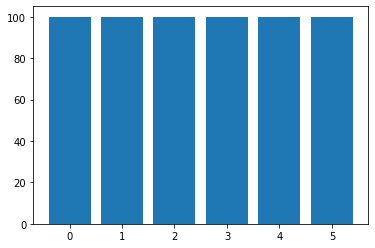

In [ ]:
labels = np.zeros(len(files))

for count, value in enumerate(files):
    if 'breath' in value:
        labels[count] = 1
    if 'growling' in value:
        labels[count] = 2
    if 'howling' in value:
        labels[count] = 3
    if 'snoring' in value:
        labels[count] = 4
    if 'whimper' in value:
        labels[count] = 5



print(labels)
print(labels.shape)
counter_mine = Counter(labels)
plt.bar(counter_mine.keys(), counter_mine.values())

#n_splits=len(np.unique(labels))

In [ ]:
folds =np.zeros(600)
i=1
num =0
while(i<11):
    numbers = range(num,num+60)
    folds[numbers] = i
    num = num +60
    i= i+1

print(folds)

my_counter = Counter(folds)
plt.bar(my_counter.keys(), my_counter.values())
n_splits=len(np.unique(labels))

#print(n_splits)

[0. 2. 4. 3. 4. 5. 1. 1. 2. 4. 0. 3. 3. 5. 5. 5. 3. 5. 0. 2. 1. 5. 3. 4.
 5. 5. 1. 5. 1. 0. 1. 1. 5. 1. 4. 2. 2. 2. 3. 1. 4. 2. 2. 4. 3. 4. 5. 3.
 1. 3. 5. 0. 5. 3. 2. 3. 1. 2. 3. 4. 0. 5. 0. 3. 5. 0. 1. 1. 0. 5. 4. 3.
 2. 3. 4. 3. 4. 0. 2. 1. 5. 1. 4. 2. 3. 1. 4. 2. 4. 4. 0. 3. 1. 0. 2. 2.
 5. 4. 1. 0. 0. 0. 2. 5. 1. 4. 2. 5. 4. 3. 1. 2. 3. 1. 1. 0. 5. 4. 1. 2.
 1. 4. 4. 0. 4. 2. 3. 3. 5. 1. 0. 3. 1. 1. 5. 1. 0. 3. 3. 1. 3. 4. 3. 2.
 1. 0. 4. 3. 5. 3. 5. 4. 0. 4. 5. 0. 1. 5. 0. 5. 4. 0. 1. 2. 3. 5. 1. 3.
 5. 3. 5. 2. 5. 4. 5. 2. 2. 3. 3. 1. 3. 2. 1. 3. 3. 1. 5. 1. 3. 2. 0. 3.
 0. 0. 4. 3. 0. 3. 0. 5. 1. 1. 0. 4. 4. 5. 0. 1. 0. 0. 5. 2. 5. 2. 0. 0.
 1. 4. 4. 2. 1. 4. 5. 0. 5. 1. 0. 3. 2. 0. 4. 4. 2. 0. 5. 5. 1. 5. 1. 1.
 5. 2. 0. 2. 1. 2. 3. 4. 1. 5. 1. 3. 4. 5. 2. 5. 2. 0. 3. 0. 5. 5. 1. 2.
 4. 0. 2. 1. 2. 5. 4. 3. 0. 5. 3. 4. 3. 1. 3. 0. 2. 2. 5. 4. 2. 1. 2. 5.
 2. 0. 5. 0. 4. 0. 3. 0. 5. 1. 0. 2. 2. 5. 0. 4. 4. 4. 5. 2. 5. 4. 2. 3.
 3. 2. 1. 0. 3. 5. 3. 5. 3. 3. 0. 4. 0. 5. 0. 0. 1.

<BarContainer object of 6 artists>

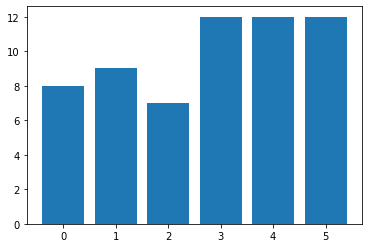

In [ ]:
#print(folds)

train_folds_mask = folds != 10
test_fold_mask = folds == 10
#print(train_folds_mask)
#print(test_fold_mask)

train_folds = folds[train_folds_mask]
test_fold = folds[test_fold_mask]


X_train = mfccs[train_folds_mask]
X_test = mfccs[test_fold_mask]

y_train = labels[train_folds_mask]
y_test = labels[test_fold_mask]

newX_train = X_train.reshape(np.shape(X_train)[0],-1) #-1 oznacza, że wszystko poza pierwszym wymiarem zostanie
                                                    #spłaszczone do jednego wymiaru
newX_test = X_test.reshape(np.shape(X_test)[0],-1)


print(y_train)
print(y_test)

counter_mine = Counter(y_test)
plt.bar(counter_mine.keys(), counter_mine.values())

#n_splits=len(np.unique(labels))

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(newX_train)
X_test = scaler.transform(newX_test)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer
scoring = {'f1_macro': make_scorer(f1_score, average ='macro')}
scoring_acc = {'accuracy': make_scorer(accuracy_score)}
model = SVC(C=1.0, random_state=42)
scores = cross_validate(model, X_train, y_train, scoring=scoring, groups=train_folds, cv=GroupKFold(n_splits=len(np.unique(train_folds))))

scores

{'fit_time': array([0.20012069, 0.19478202, 0.1897316 , 0.1811583 , 0.18104506,
        0.18590736, 0.3130734 , 0.2102437 , 0.20151281]),
 'score_time': array([0.05482626, 0.07431436, 0.04800129, 0.04809618, 0.04579091,
        0.07840466, 0.05062413, 0.04942942, 0.04887533]),
 'test_f1_macro': array([0.56397995, 0.62075594, 0.59819364, 0.5762053 , 0.67638385,
        0.59214001, 0.53214286, 0.60391608, 0.55233918])}

In [ ]:
model.fit(X_train, y_train)
model_test_preds = model.predict(X_test)

print('test accuracy = ', accuracy_score(y_test, model_test_preds))
print('test F1 = ', f1_score(y_test, model_test_preds, average='macro'))
print(confusion_matrix(y_test, model_test_preds))

test accuracy =  0.7166666666666667
test F1 =  0.7138423710792132
[[5 0 2 0 1 0]
 [0 7 0 0 0 2]
 [0 0 7 0 0 0]
 [2 0 1 8 0 1]
 [1 2 0 0 9 0]
 [0 1 4 0 0 7]]


In [ ]:
model = SVC

def get_space(trial):
    space = {'C': trial.suggest_uniform('C', 0, 2),
            'max_iter': trial.suggest_int('max_iter', 100, 1000),
            'kernel': trial.suggest_categorical('kernel',['linear', 'poly','rbf', 'sigmoid']),
            'degree': trial.suggest_int('degree', 1,6)}
    return space
trials = 200 #liczba prób

def objective(trial, model, X_train, y_train):
    model_space = get_space(trial)

    mdl = model(**model_space)
    scores = cross_validate(mdl, X_train, y_train, groups=train_folds, scoring=scoring_acc, cv=GroupKFold(n_splits=len(np.unique(train_folds))), return_train_score=True)

    return np.mean(scores['test_accuracy'])

In [ ]:
study = optuna.create_study(direction='maximize')

[I 2022-12-22 23:15:22,180] A new study created in memory with name: no-name-c24742fb-9127-4c19-85d5-77226d8b90ce


In [ ]:
%%time

study.optimize(lambda x: objective(x, model, X_train, y_train), n_trials=trials)

In [ ]:
print('params: ', study.best_params)

params:  {'C': 1.9988848156086596, 'max_iter': 107, 'kernel': 'rbf', 'degree': 1}


In [ ]:
SVM = model(**study.best_params)
SVM.fit(X_train, y_train)
model_preds = SVM.predict(X_test)

print('test accuracy = ', accuracy_score(y_test, model_preds))
print('test F1 = ', f1_score(y_test, model_preds, average='macro'))
print(confusion_matrix(y_test, model_preds))

test accuracy =  0.75
test F1 =  0.742610415638414
[[ 5  0  2  0  1  0]
 [ 0  7  0  0  0  2]
 [ 1  0  6  0  0  0]
 [ 2  0  1  8  0  1]
 [ 0  0  1  0 11  0]
 [ 1  1  2  0  0  8]]


C:\Users\jakub\anaconda3\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=107).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(mfccs, labels, test_size=0.2, random_state=42,stratify=labels)

X_train = X_train.reshape(np.shape(X_train)[0],-1)
X_test = X_test.reshape(np.shape(X_test)[0],-1)

scaler = StandardScaler()
newX_train = scaler.fit_transform(X_train)
newX_test = scaler.transform(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#klasyfikacja
SVM = SVC(C=1.0, random_state=42)
SVM.fit(newX_train, y_train)
SVM_test_preds = SVM.predict(newX_test)

print('test accuracy = ', accuracy_score(y_test, SVM_test_preds))
print('test F1 = ', f1_score(y_test, SVM_test_preds, average='macro'))
print(confusion_matrix(y_test, SVM_test_preds))

test accuracy =  0.7
test F1 =  0.698987019718727
[[13  0  1  2  1  3]
 [ 0 16  1  0  3  0]
 [ 0  1 13  0  2  4]
 [ 1  0  2 16  1  0]
 [ 1  1  2  0 16  0]
 [ 1  1  3  3  2 10]]


In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(newX_train, y_train)
model_test_preds = model.predict(newX_test)

print('test accuracy = ', accuracy_score(y_test, model_test_preds))
print('test F1 = ', f1_score(y_test, model_test_preds, average='macro'))
print(confusion_matrix(y_test, model_test_preds))

test accuracy =  0.6333333333333333
test F1 =  0.6203101468554345
[[12  0  0  3  1  4]
 [ 0 15  2  1  2  0]
 [ 2  1 13  0  4  0]
 [ 1  1  4 14  0  0]
 [ 0  0  2  0 17  1]
 [ 2  1  3  5  4  5]]
